In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Загрузка данных

In [242]:
#%%capture
#!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [243]:
data = pd.read_excel('data/data_ford_price.xlsx') 

#  Отбор признаков: мотивация

## Предобработка данных

In [244]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

## Обучение модели

In [245]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


## Удаление избыточного признака

In [246]:
x.drop('lat', axis = 1, inplace = True)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [248]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4672.930


#  Отбор признаков: классификация методов

## Метод рекурсивного исключения признаков

In [249]:
from sklearn.feature_selection import RFE

In [250]:
y = data['price']
x = data.drop(columns='price')

In [251]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [252]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

In [253]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [254]:
selector.ranking_

array([1, 1, 4, 1, 3, 2])

##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [255]:
from sklearn.feature_selection import SelectKBest, f_regression

In [256]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

# <center> Домашнее задание

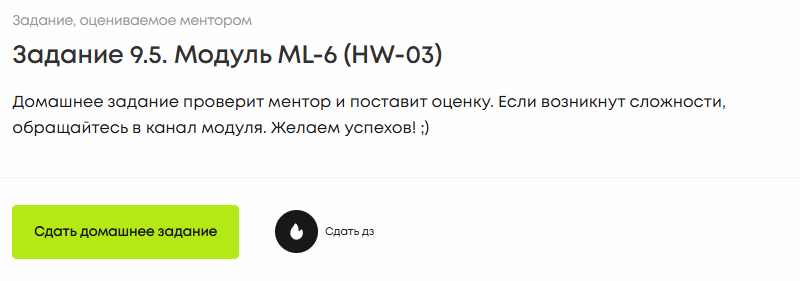

## **Основываясь на описании задания из сообщения ментора: Задача состоит в обучении задачи линейной регрессии на найденных двумя способами трех важных признаков и сравнить полученные результаты.**

In [257]:
# прочитаем исходную таблицы
data = pd.read_excel('data/data_ford_price.xlsx') 
data.head(3)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0


Оставляем только "отобранные важные" признаки и коючевой признак "цена", для преобразования данных обьединим эти списки:

In [258]:
data = data[['year', 'cylinders', 'lat', 'odometer', 'price']]
data.head(3)

,year,cylinders,lat,odometer,price
0,2016,6,36.471500,43500,43900
1,2009,8,40.468826,98131,15490
2,2002,8,42.477134,201803,2495


Построение гистограмм для отобранных признаков

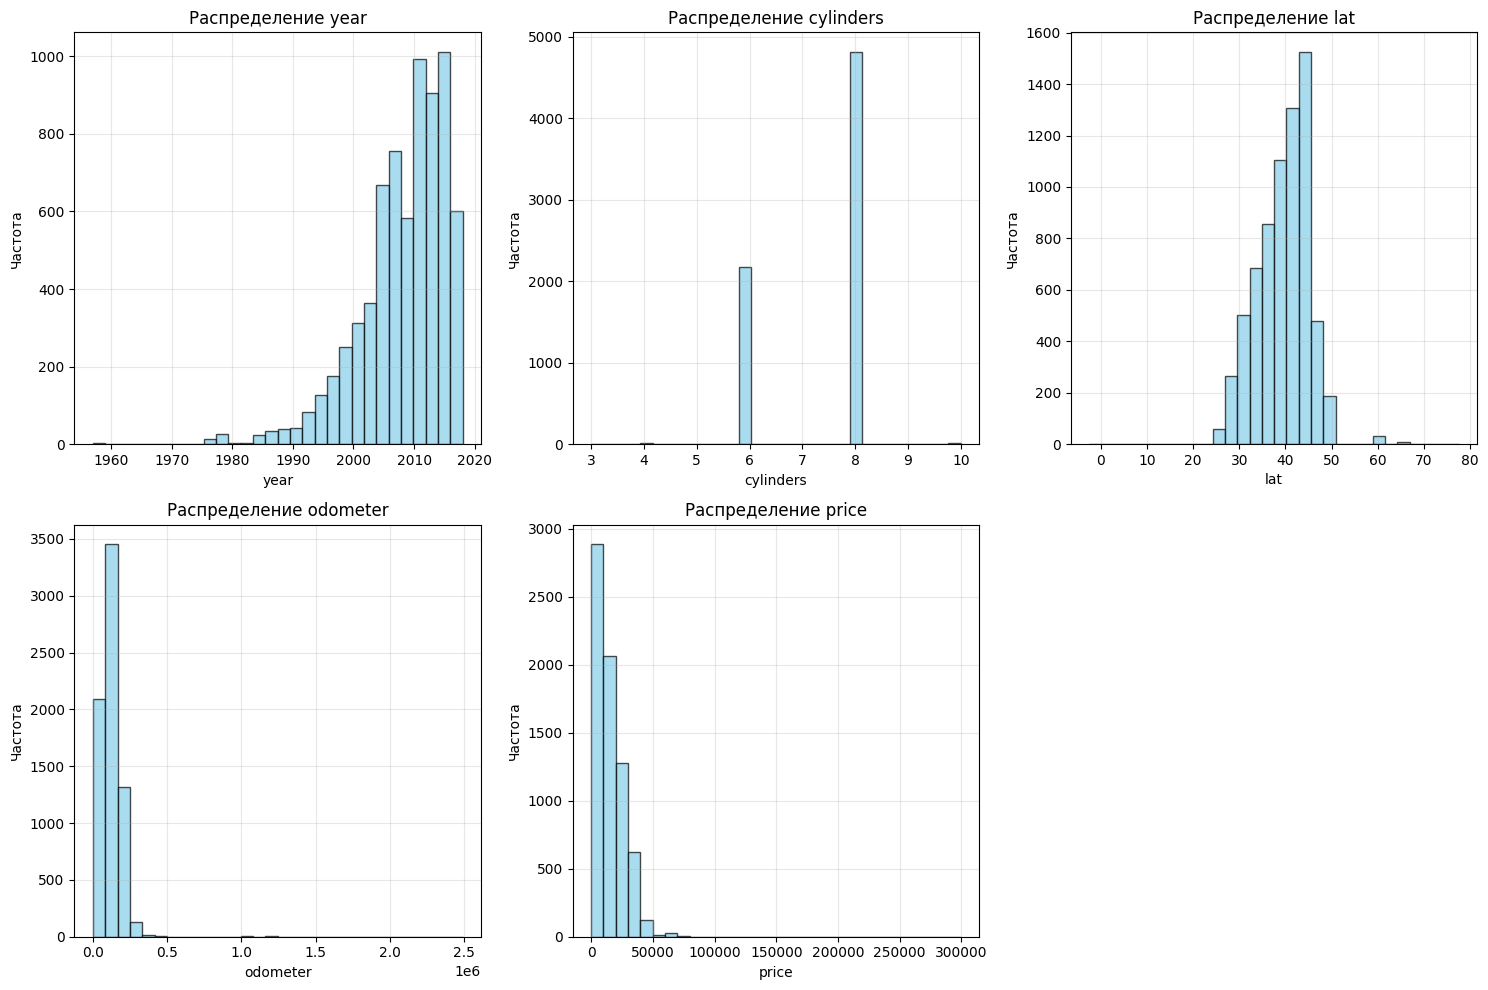

Основная статистика по отобранным признакам:
              year    cylinders          lat      odometer          price
count  7017.000000  7017.000000  7017.000000  7.017000e+03    7017.000000
mean   2007.869745     7.374662    39.550144  1.199787e+05   15121.549523
std       6.975329     0.942928     5.745409  8.992216e+04   11765.423119
min    1957.000000     3.000000    -2.508807  0.000000e+00       1.000000
25%    2004.000000     6.000000    35.661076  7.328500e+04    5995.000000
50%    2010.000000     8.000000    40.335245  1.180000e+05   12750.000000
75%    2013.000000     8.000000    43.582100  1.578040e+05   21995.000000
max    2018.000000    10.000000    77.617682  2.490000e+06  299500.000000


In [259]:
# Построим гистограммы для всех признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()  # Превращаем в одномерный массив для удобства

columns = data.columns
for i, column in enumerate(columns):
    axes[i].hist(data[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Распределение {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Частота')
    axes[i].grid(True, alpha=0.3)

# Убираем лишний subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Также выведем основную статистику
print("Основная статистика по отобранным признакам:")
print(data.describe())

Логарифмического преобразование 'price'

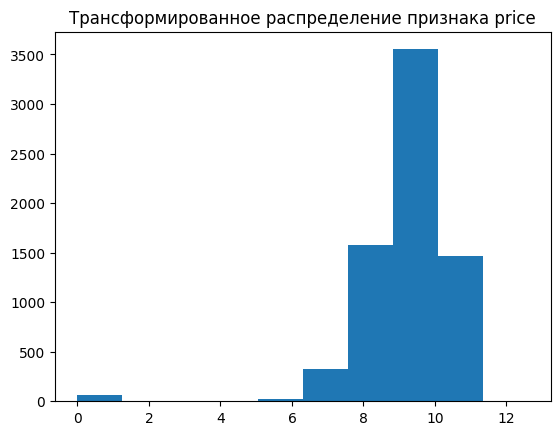

In [260]:
data['price'] = np.log(data['price'])

# выведем гистограмма
log_price = data['price']
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

Нормализация методом RobustScaler для 'odometer'

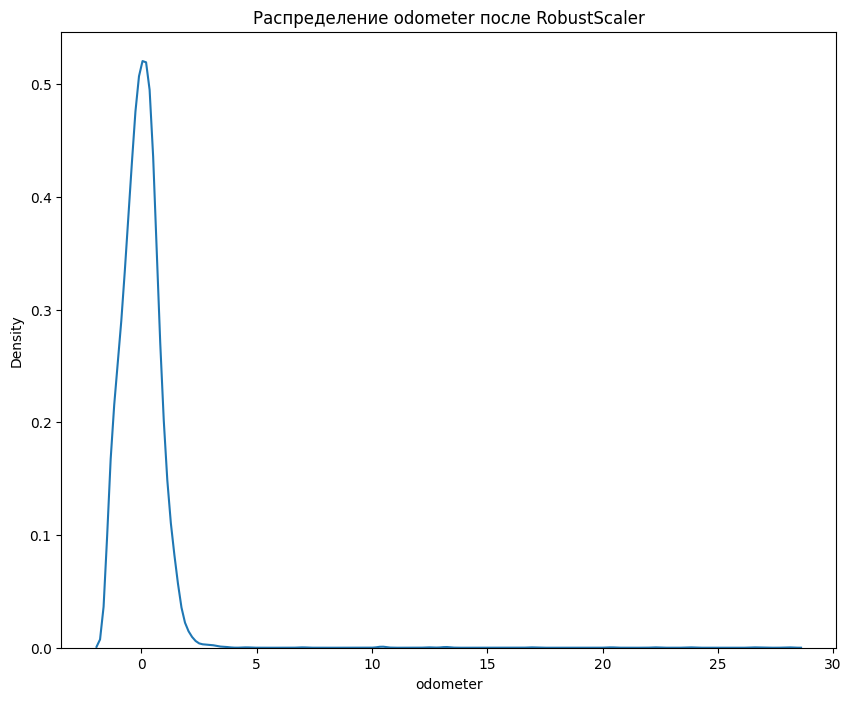

In [261]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# Преобразуем в 2D массив для RobustScaler
df = data['odometer'].values.reshape(-1, 1)
df_r = r_scaler.fit_transform(df)

# Преобразуем обратно в DataFrame для визуализации
df_r = pd.DataFrame(df_r, columns=['odometer'])

# Применяем преобразование к исходным данным
data['odometer'] = df_r['odometer'].values

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение odometer после RobustScaler')

sns.kdeplot(data=df_r, x='odometer', ax=ax1)
plt.show()

Преобразуем признак 'year'

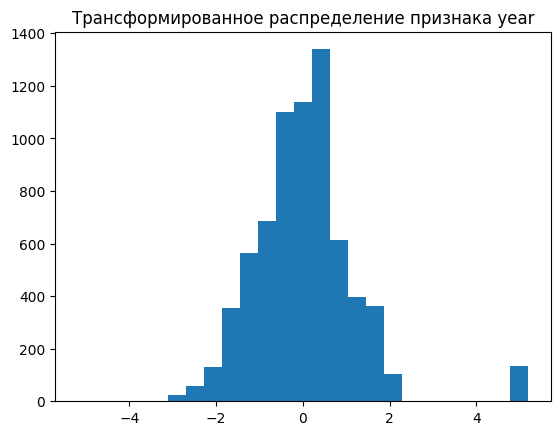

In [262]:
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)

data['year'] = data_transformed.flatten()

 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

Количество цилиндров является номинальным признаком, закодируем его с помощью OneHotEncoding

In [263]:
one_hot_encoder = OneHotEncoder()
columns_to_change = ['cylinders']
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10']


In [264]:
# Преобразуем numpy array в DataFrame и добавляем к исходным данным
data_onehot_df = pd.DataFrame(data_onehot, columns=column_names, index=data.index)
data = pd.concat([data, data_onehot_df], axis=1)

# Удаляем исходный столбец cylinders, так как он заменён закодированными признаками
data = data.drop('cylinders', axis=1)
data.head(3)

,year,lat,odometer,price,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10
0,1.558482,36.471500,-0.881459,10.689670,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.041413,40.468826,-0.235083,9.647950,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.933910,42.477134,0.991529,7.822044,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.149742,40.764373,0.618855,7.170120,0.0,0.0,0.0,0.0,1.0,0.0
4,0.099274,49.210949,0.568653,9.537123,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7012,1.204935,32.680700,-1.118092,10.021271,0.0,0.0,0.0,1.0,0.0,0.0
7013,-0.570161,38.213303,-1.396136,8.695339,0.0,0.0,0.0,0.0,1.0,0.0
7014,-0.415634,37.609783,0.514843,9.210240,0.0,0.0,0.0,0.0,1.0,0.0
7015,0.279606,43.140600,0.544256,9.296518,0.0,0.0,0.0,0.0,1.0,0.0


### <center> Моделирование #1 по результатам **RFE**, признаки ['year', 'cylinders', 'lat']

In [265]:
#удалим признак не входящий в "важные признаки" по RFE
data = data.drop('odometer', axis=1)

#X - матрица наблюдений, y - столбец правильных ответов
X = data.drop('price', axis=1)
y = data['price']
#Разделяем выборку на тренировочную и тестовую в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (5613, 8)
Test shape: (1404, 8)


Заранее создадим функцию, которая будет расчитывать метрики:

1. MAE - средняя абсолютная ошибка (целевая метрика)
2. MAPE - средняя абсолютная ошибка в процентах 
3. $R^2$ - коэффициент детерминации 

In [268]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [271]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель предсказывать логарифм целевого признака
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.359
Train MAE: 0.521
Train MAPE: 32543211011440908.000


Test R^2: 0.427
Test MAE: 0.508
Train MAPE: 17020706006890638.000


In [272]:
#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr_poly.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(ridge_lr_poly.predict(X_train))
y_test_pred = np.exp(ridge_lr_poly.predict(X_test))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: -685923587.738
Train MAE: 14928.024
Train MAPE: 37270093901303201792.000


Test R^2: -1003538523.500
Test MAE: 16531.841
Train MAPE: 17429409913652729856.000


In [278]:
# прочитаем исходную таблицы
data = pd.read_excel('data/data_ford_price.xlsx') 
data = data[['year', 'cylinders', 'lat', 'price']]
data

,year,cylinders,lat,price
0,2016,6,36.471500,43900
1,2009,8,40.468826,15490
2,2002,8,42.477134,2495
3,2000,8,40.764373,1300
4,2010,8,49.210949,13865
...,...,...,...,...
7012,2015,6,32.680700,22500
7013,2005,8,38.213303,5975
7014,2006,8,37.609783,9999
7015,2011,8,43.140600,10900


In [279]:
#X - матрица наблюдений, y - столбец правильных ответов
X = data.drop('price', axis=1)
y = data['price']
#Разделяем выборку на тренировочную и тестовую в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (5613, 3)
Test shape: (1404, 3)


In [280]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель предсказывать логарифм целевого признака
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.575
Train MAE: 5251.427
Train MAPE: 13240.475


Test R^2: 0.386
Test MAE: 5513.684
Train MAPE: 8874.043
